In [1]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time


from numpy import genfromtxt
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report
from mpl_toolkits.mplot3d import Axes3D


from sklearn.linear_model import LogisticRegression
#----------------------------------------------Neural Net Imports
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical

# Linear stack of NN layers
from keras.models import Sequential

# Ensure Fully connected layer 
from keras.layers import Dense
#----------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



num_pixels = 28
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Importing training  data from CSV files
x_train = genfromtxt('Data/Training/x_train_gr_smpl.csv', delimiter=',', skip_header =1)
y_train = genfromtxt('Data/Training/y_train_smpl.csv', delimiter=',', skip_header =1 )

In [3]:
# Importing testing data from CSV files
x_test = genfromtxt('Data/Testing/x_test_gr_smpl.csv', delimiter=',', skip_header =1)
y_test = genfromtxt('Data/Testing/y_test_smpl.csv', delimiter=',', skip_header =1 )

In [4]:
y_train = y_train.reshape(12660,1)
train_data_combined = np.append(x_train, y_train, axis=1)

y_test = y_test.reshape(4170,1)
test_data_combined = np.append(x_test, y_test, axis=1)
np.random.seed(0)
np.random.shuffle(train_data_combined)
np.random.shuffle(test_data_combined)
x_train = train_data_combined[:,:-1]
y_train = train_data_combined[:, [-1]].reshape(12660,)

x_test = test_data_combined[:,:-1]
y_test = test_data_combined[:, [-1]].reshape(4170,)
# Normalisation of pixels
x_train = x_train.astype('float')/255
x_test  = x_test.astype('float')/255
#  Reducing the number of attributes using opencv's reduce functionality as shown in the second python Lecture
#  As seen in python lectures: https://vision.hw.ac.uk/webapps/blackboard/content/listContent.jsp?course_id=_94419_1&content_id=_3391865_1

x_train = np.apply_along_axis(
        func1d=lambda img: cv2.resize(img.reshape((48,48)), (num_pixels,num_pixels)),
        axis =1, arr = x_train).reshape((-1,num_pixels*num_pixels))

x_test  = np.apply_along_axis(
        func1d=lambda img: cv2.resize(img.reshape((48,48)), (num_pixels,num_pixels)),
        axis =1, arr = x_test).reshape((-1,num_pixels*num_pixels))

In [5]:
# Creating 10 bins for output
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [6]:
model = Sequential()

In [7]:
model.add(Dense(512, activation = 'relu',input_shape=(784,)))

# Layer 2
model.add(Dense(512, activation = 'relu'))

#Output Layer
model.add(Dense(10, activation = 'softmax'))

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [10]:
Base_Model = model.fit(x_train,y_train, epochs = 20, validation_data = (x_test, y_test))

Train on 12660 samples, validate on 4170 samples
Epoch 1/20
12660/12660 [==============================] - 3s 276us/step - loss: 0.8476 - accuracy: 0.7291 - val_loss: 0.6365 - val_accuracy: 0.7818
Epoch 2/20
12660/12660 [==============================] - 3s 252us/step - loss: 0.3784 - accuracy: 0.8754 - val_loss: 0.4639 - val_accuracy: 0.8549
Epoch 3/20
12660/12660 [==============================] - 3s 273us/step - loss: 0.2945 - accuracy: 0.9061 - val_loss: 0.4238 - val_accuracy: 0.8787
Epoch 4/20
12660/12660 [==============================] - 3s 252us/step - loss: 0.2151 - accuracy: 0.9314 - val_loss: 0.4344 - val_accuracy: 0.8978
Epoch 5/20
12660/12660 [==============================] - 3s 253us/step - loss: 0.2086 - accuracy: 0.9323 - val_loss: 0.5397 - val_accuracy: 0.8600
Epoch 6/20
12660/12660 [==============================] - 3s 253us/step - loss: 0.1624 - accuracy: 0.9464 - val_loss: 0.4086 - val_accuracy: 0.8942
Epoch 7/20
12660/12660 [==============================] - 3s 24

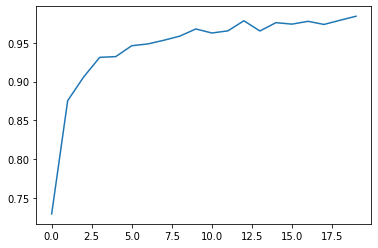

In [11]:
plt.plot(Base_Model.history['accuracy'])

Text(0, 0.5, 'Accuracy')

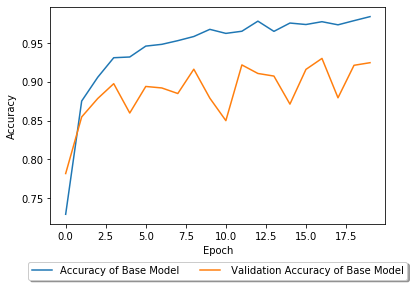

In [12]:
plt.plot(Base_Model.history['accuracy'], label='Accuracy of Base Model')
plt.plot(Base_Model.history['val_accuracy'], label=' Validation Accuracy of Base Model')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [13]:
score = model.evaluate(x_test, y_test) 

4170/4170 [==============================] - 0s 69us/step


In [14]:
score 

[0.400609667156153, 0.9249400496482849]

In [15]:
predictions = model.predict_classes(x_test, batch_size=10)

In [16]:
rounded_labels=np.argmax(y_test, axis=1)

In [17]:
cm = confusion_matrix(rounded_labels, predictions)

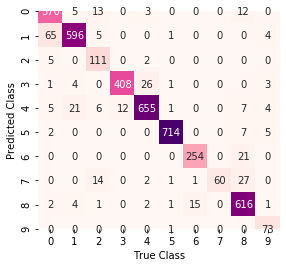

In [18]:
sns.heatmap(cm.T, square=True, annot=True,cmap="RdPu", fmt='.0f', cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class');

In [19]:
print(classification_report(rounded_labels,predictions))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       450
           1       0.89      0.95      0.92       630
           2       0.94      0.74      0.83       150
           3       0.92      0.97      0.95       420
           4       0.92      0.95      0.94       690
           5       0.98      0.99      0.99       720
           6       0.92      0.94      0.93       270
           7       0.57      1.00      0.73        60
           8       0.96      0.89      0.92       690
           9       0.99      0.81      0.89        90

    accuracy                           0.92      4170
   macro avg       0.90      0.91      0.90      4170
weighted avg       0.93      0.92      0.93      4170



# Changing Layers

## Double the layers

In [20]:
model1 = Sequential()

In [21]:
model1.add(Dense(512, activation = 'relu',input_shape=(784,)))

# Layer 2
model1.add(Dense(512, activation = 'relu'))

# Layer 3
model1.add(Dense(512, activation = 'relu'))

# Layer 4
model1.add(Dense(512, activation = 'relu'))

#Output Layer
model1.add(Dense(10, activation = 'softmax'))

In [22]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [23]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 1,195,018
Trainable params: 1,195,018
Non-trainable params: 0
_________________________________________________________________


In [24]:
DoubleLayer = model1.fit(x_train,y_train, epochs = 20, validation_data = (x_test, y_test))

Train on 12660 samples, validate on 4170 samples
Epoch 1/20
12660/12660 [==============================] - 6s 466us/step - loss: 0.8311 - accuracy: 0.7138 - val_loss: 1.8196 - val_accuracy: 0.6235
Epoch 2/20
12660/12660 [==============================] - 5s 431us/step - loss: 0.3992 - accuracy: 0.8570 - val_loss: 0.5062 - val_accuracy: 0.8096
Epoch 3/20
12660/12660 [==============================] - 5s 434us/step - loss: 0.2785 - accuracy: 0.9015 - val_loss: 0.4582 - val_accuracy: 0.8710
Epoch 4/20
12660/12660 [==============================] - 5s 423us/step - loss: 0.2144 - accuracy: 0.9245 - val_loss: 0.3902 - val_accuracy: 0.8902
Epoch 5/20
12660/12660 [==============================] - 6s 439us/step - loss: 0.2089 - accuracy: 0.9237 - val_loss: 0.5350 - val_accuracy: 0.8633
Epoch 6/20
12660/12660 [==============================] - 6s 469us/step - loss: 0.1714 - accuracy: 0.9389 - val_loss: 0.3655 - val_accuracy: 0.8947
Epoch 7/20
12660/12660 [==============================] - 6s 46

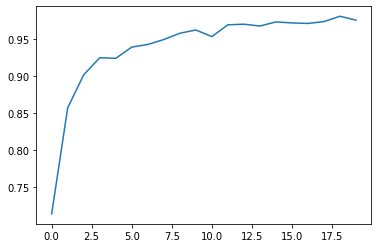

In [25]:
plt.plot(DoubleLayer.history['accuracy'])

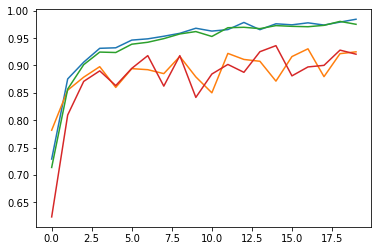

In [26]:
plt.plot(Base_Model.history['accuracy'])
plt.plot(Base_Model.history['val_accuracy'])
plt.plot(DoubleLayer.history['accuracy'])
plt.plot(DoubleLayer.history['val_accuracy'])

In [27]:
score = model1.evaluate(x_test, y_test)

4170/4170 [==============================] - 0s 103us/step


In [28]:
score

[0.3755199900598821, 0.9206234812736511]

In [29]:
predictions = model1.predict_classes(x_test, batch_size=10)

In [30]:
cm = confusion_matrix(rounded_labels, predictions)

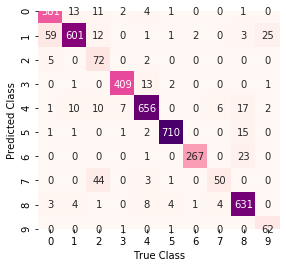

In [31]:
sns.heatmap(cm.T, square=True, annot=True,cmap="RdPu", fmt='.0f', cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class');

In [32]:
print(classification_report(rounded_labels,predictions))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       450
           1       0.85      0.95      0.90       630
           2       0.91      0.48      0.63       150
           3       0.96      0.97      0.97       420
           4       0.93      0.95      0.94       690
           5       0.97      0.99      0.98       720
           6       0.92      0.99      0.95       270
           7       0.51      0.83      0.63        60
           8       0.96      0.91      0.94       690
           9       0.97      0.69      0.81        90

    accuracy                           0.92      4170
   macro avg       0.89      0.86      0.86      4170
weighted avg       0.93      0.92      0.92      4170



## Half the Layers

In [33]:
model2 = Sequential()

In [34]:
model2.add(Dense(512, activation = 'relu',input_shape=(784,)))

#Output Layer
model2.add(Dense(10, activation = 'softmax'))

In [35]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [36]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [37]:
OneLayer = model2.fit(x_train,y_train, epochs = 20, validation_data = (x_test, y_test))

Train on 12660 samples, validate on 4170 samples
Epoch 1/20
12660/12660 [==============================] - 2s 186us/step - loss: 0.9861 - accuracy: 0.7162 - val_loss: 0.7135 - val_accuracy: 0.7765
Epoch 2/20
12660/12660 [==============================] - 2s 175us/step - loss: 0.4488 - accuracy: 0.8731 - val_loss: 0.7383 - val_accuracy: 0.7811
Epoch 3/20
12660/12660 [==============================] - 2s 164us/step - loss: 0.3477 - accuracy: 0.8987 - val_loss: 0.4643 - val_accuracy: 0.8698
Epoch 4/20
12660/12660 [==============================] - 2s 168us/step - loss: 0.2722 - accuracy: 0.9219 - val_loss: 0.4170 - val_accuracy: 0.8914
Epoch 5/20
12660/12660 [==============================] - 2s 166us/step - loss: 0.2283 - accuracy: 0.9368 - val_loss: 0.4169 - val_accuracy: 0.8662
Epoch 6/20
12660/12660 [==============================] - 2s 169us/step - loss: 0.2060 - accuracy: 0.9432 - val_loss: 0.4469 - val_accuracy: 0.8638
Epoch 7/20
12660/12660 [==============================] - 2s 16

Text(0, 0.5, 'Accuracy')

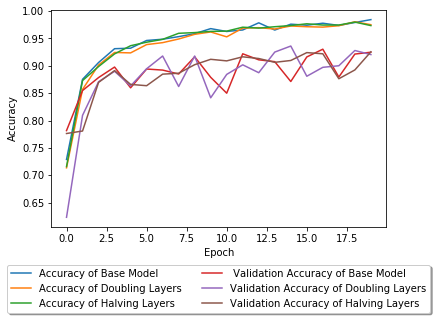

In [38]:
plt.plot(Base_Model.history['accuracy'], label='Accuracy of Base Model')
plt.plot(DoubleLayer.history['accuracy'], label='Accuracy of Doubling Layers')
plt.plot(OneLayer.history['accuracy'], label='Accuracy of Halving Layers')
plt.plot(Base_Model.history['val_accuracy'], label=' Validation Accuracy of Base Model')
plt.plot(DoubleLayer.history['val_accuracy'], label='Validation Accuracy of Doubling Layers')
plt.plot(OneLayer.history['val_accuracy'], label='Validation Accuracy of Halving Layers')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')



In [39]:
score = model2.evaluate(x_test, y_test)

4170/4170 [==============================] - 0s 66us/step


In [40]:
score

[0.3763268517406224, 0.9256594777107239]

In [41]:
predictions = model2.predict_classes(x_test, batch_size=10)

In [42]:
cm = confusion_matrix(rounded_labels, predictions)

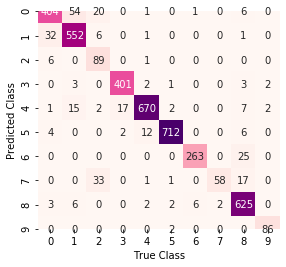

In [43]:
sns.heatmap(cm.T, square=True, annot=True,cmap="RdPu", fmt='.0f', cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class');

In [44]:
print(classification_report(rounded_labels,predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       450
           1       0.93      0.88      0.90       630
           2       0.93      0.59      0.72       150
           3       0.97      0.95      0.96       420
           4       0.94      0.97      0.95       690
           5       0.97      0.99      0.98       720
           6       0.91      0.97      0.94       270
           7       0.53      0.97      0.68        60
           8       0.97      0.91      0.94       690
           9       0.98      0.96      0.97        90

    accuracy                           0.93      4170
   macro avg       0.90      0.91      0.89      4170
weighted avg       0.93      0.93      0.93      4170



# Changing Epochs

## Half Epochs

In [45]:
model3 = Sequential()

In [46]:
model3.add(Dense(512, activation = 'relu',input_shape=(784,)))

# Layer 2
model3.add(Dense(512, activation = 'relu'))

#Output Layer
model3.add(Dense(10, activation = 'softmax'))

In [47]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [48]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_12 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [49]:
HalfEpochs = model3.fit(x_train,y_train, epochs = 10, validation_data = (x_test, y_test))

Train on 12660 samples, validate on 4170 samples
Epoch 1/10
12660/12660 [==============================] - 3s 271us/step - loss: 0.8376 - accuracy: 0.7333 - val_loss: 0.5845 - val_accuracy: 0.8089
Epoch 2/10
12660/12660 [==============================] - 4s 297us/step - loss: 0.3887 - accuracy: 0.8759 - val_loss: 0.4485 - val_accuracy: 0.8535
Epoch 3/10
12660/12660 [==============================] - 4s 281us/step - loss: 0.2761 - accuracy: 0.9086 - val_loss: 0.4983 - val_accuracy: 0.8638
Epoch 4/10
12660/12660 [==============================] - 3s 259us/step - loss: 0.2200 - accuracy: 0.9310 - val_loss: 0.7433 - val_accuracy: 0.8400
Epoch 5/10
12660/12660 [==============================] - 3s 256us/step - loss: 0.1944 - accuracy: 0.9371 - val_loss: 0.5422 - val_accuracy: 0.8556
Epoch 6/10
12660/12660 [==============================] - 3s 255us/step - loss: 0.1504 - accuracy: 0.9519 - val_loss: 0.3953 - val_accuracy: 0.9000
Epoch 7/10
12660/12660 [==============================] - 3s 26

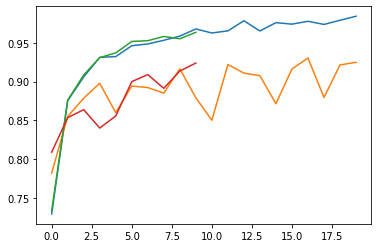

In [50]:
plt.plot(Base_Model.history['accuracy'])
plt.plot(Base_Model.history['val_accuracy'])
plt.plot(HalfEpochs.history['accuracy'])
plt.plot(HalfEpochs.history['val_accuracy'])

In [51]:
score = model3.evaluate(x_test, y_test)

4170/4170 [==============================] - 0s 70us/step


In [52]:
score

[0.3556479910723597, 0.9239808320999146]

(0, 10.0)

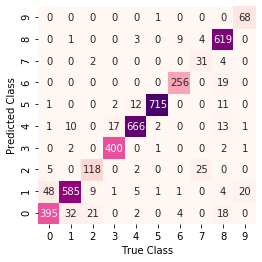

In [77]:
predictions = model3.predict_classes(x_test, batch_size=10)
cm = confusion_matrix(rounded_labels, predictions)
sns.heatmap(cm.T, square=True, annot=True,cmap="RdPu", fmt='.0f', cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
axes = plt.gca()
axes.set_ylim([0,10.0])

In [54]:
print(classification_report(rounded_labels,predictions))


              precision    recall  f1-score   support

           0       0.84      0.88      0.86       450
           1       0.87      0.93      0.90       630
           2       0.79      0.79      0.79       150
           3       0.99      0.95      0.97       420
           4       0.94      0.97      0.95       690
           5       0.96      0.99      0.98       720
           6       0.93      0.95      0.94       270
           7       0.84      0.52      0.64        60
           8       0.97      0.90      0.93       690
           9       0.99      0.76      0.86        90

    accuracy                           0.92      4170
   macro avg       0.91      0.86      0.88      4170
weighted avg       0.93      0.92      0.92      4170



# Double Epochs

In [55]:
model5 = Sequential()

In [56]:
model5.add(Dense(512, activation='relu', input_shape=(784,)))
model5.add(Dense(512, activation='relu'))
model5.add(Dense(10, activation='softmax'))


In [57]:
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [58]:
model5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_15 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_16 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [59]:
DoubleEpochs = model5.fit(x_train,y_train,epochs=40,validation_data=(x_test,y_test))

Train on 12660 samples, validate on 4170 samples
Epoch 1/40
12660/12660 [==============================] - 4s 278us/step - loss: 0.8049 - accuracy: 0.7490 - val_loss: 0.6941 - val_accuracy: 0.7789
Epoch 2/40
12660/12660 [==============================] - 3s 268us/step - loss: 0.3541 - accuracy: 0.8828 - val_loss: 0.5274 - val_accuracy: 0.8300
Epoch 3/40
12660/12660 [==============================] - 4s 289us/step - loss: 0.3008 - accuracy: 0.9051 - val_loss: 0.4704 - val_accuracy: 0.8564
Epoch 4/40
12660/12660 [==============================] - 3s 259us/step - loss: 0.2268 - accuracy: 0.9300 - val_loss: 0.4749 - val_accuracy: 0.8434
Epoch 5/40
12660/12660 [==============================] - 3s 250us/step - loss: 0.1966 - accuracy: 0.9354 - val_loss: 0.3697 - val_accuracy: 0.9038
Epoch 6/40
12660/12660 [==============================] - 3s 268us/step - loss: 0.1670 - accuracy: 0.9432 - val_loss: 0.3532 - val_accuracy: 0.9144
Epoch 7/40
12660/12660 [==============================] - 3s 26

Text(0, 0.5, 'Accuracy')

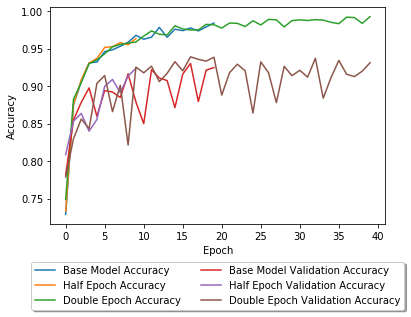

In [60]:
plt.plot(Base_Model.history['accuracy'], label='Base Model Accuracy')
plt.plot(HalfEpochs.history['accuracy'], label='Half Epoch Accuracy')
plt.plot(DoubleEpochs.history['accuracy'], label='Double Epoch Accuracy')
plt.plot(Base_Model.history['val_accuracy'], label='Base Model Validation Accuracy')
plt.plot(HalfEpochs.history['val_accuracy'], label='Half Epoch Validation Accuracy')
plt.plot(DoubleEpochs.history['val_accuracy'], label='Double Epoch Validation Accuracy')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [61]:
score = model5.evaluate(x_test, y_test)

4170/4170 [==============================] - 0s 63us/step


In [62]:
score

[0.48822109230170896, 0.9314148426055908]

Text(79.60000000000001, 0.5, 'Predicted Class')

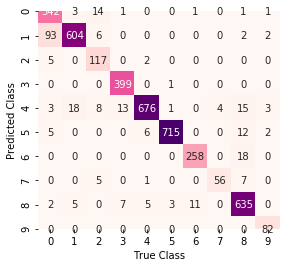

In [63]:
predictions = model5.predict_classes(x_test, batch_size=10)
cm = confusion_matrix(rounded_labels, predictions)
sns.heatmap(cm.T, square=True, annot=True,cmap="RdPu", fmt='.0f', cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class')

In [64]:
print(classification_report(rounded_labels,predictions))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84       450
           1       0.85      0.96      0.90       630
           2       0.94      0.78      0.85       150
           3       1.00      0.95      0.97       420
           4       0.91      0.98      0.94       690
           5       0.97      0.99      0.98       720
           6       0.93      0.96      0.95       270
           7       0.81      0.93      0.87        60
           8       0.95      0.92      0.94       690
           9       1.00      0.91      0.95        90

    accuracy                           0.93      4170
   macro avg       0.93      0.91      0.92      4170
weighted avg       0.93      0.93      0.93      4170



In [65]:
model6 = Sequential()

In [66]:
model6.add(Dense(512, activation='relu', input_shape=(784,)))
model6.add(Dense(512, activation='relu'))
model6.add(Dense(10, activation='softmax'))

In [67]:
model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [68]:
model6.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_18 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [69]:
FiveEpochs = model6.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Train on 12660 samples, validate on 4170 samples
Epoch 1/5
12660/12660 [==============================] - 3s 264us/step - loss: 0.8239 - accuracy: 0.7421 - val_loss: 0.5445 - val_accuracy: 0.8266
Epoch 2/5
12660/12660 [==============================] - 3s 241us/step - loss: 0.3544 - accuracy: 0.8821 - val_loss: 0.5239 - val_accuracy: 0.8412
Epoch 3/5
12660/12660 [==============================] - 3s 244us/step - loss: 0.2915 - accuracy: 0.9047 - val_loss: 0.4517 - val_accuracy: 0.8748
Epoch 4/5
12660/12660 [==============================] - 3s 240us/step - loss: 0.2208 - accuracy: 0.9288 - val_loss: 0.4359 - val_accuracy: 0.8959
Epoch 5/5
12660/12660 [==============================] - 3s 242us/step - loss: 0.2002 - accuracy: 0.9340 - val_loss: 0.2948 - val_accuracy: 0.9165


Text(0, 0.5, 'Accuracy')

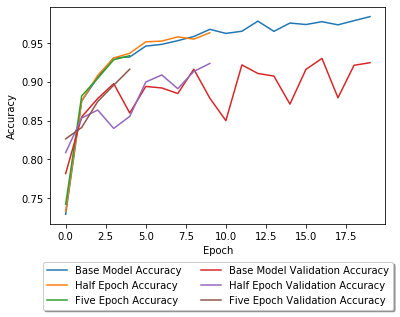

In [89]:
plt.plot(Base_Model.history['accuracy'], label='Base Model Accuracy')
plt.plot(HalfEpochs.history['accuracy'], label='Half Epoch Accuracy')
plt.plot(FiveEpochs.history['accuracy'], label='Five Epoch Accuracy')
plt.plot(Base_Model.history['val_accuracy'], label='Base Model Validation Accuracy')
plt.plot(HalfEpochs.history['val_accuracy'], label='Half Epoch Validation Accuracy')
plt.plot(FiveEpochs.history['val_accuracy'], label='Five Epoch Validation Accuracy')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Validation Threshold

In [92]:
from keras.callbacks import EarlyStopping

In [93]:
model8 = Sequential()

In [94]:
model8.add(Dense(512, activation='relu', input_shape=(784,)))
model8.add(Dense(512, activation='relu'))
model8.add(Dense(10, activation='softmax'))

In [95]:
es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=1)

In [96]:
model8.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'],)

In [97]:
model8.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_27 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_28 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [98]:
Activation1 = model8.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test), callbacks=[es])

Train on 12660 samples, validate on 4170 samples
Epoch 1/20
12660/12660 [==============================] - 4s 282us/step - loss: 0.8315 - accuracy: 0.7343 - val_loss: 0.5953 - val_accuracy: 0.8053
Epoch 2/20
12660/12660 [==============================] - 3s 268us/step - loss: 0.3729 - accuracy: 0.8784 - val_loss: 0.6708 - val_accuracy: 0.8141


Text(0, 0.5, 'Accuracy')

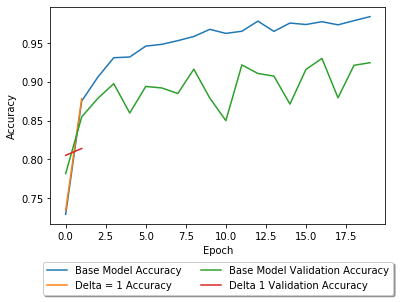

In [99]:
plt.plot(Base_Model.history['accuracy'], label='Base Model Accuracy')
plt.plot(Activation1.history['accuracy'], label='Delta = 1 Accuracy')
plt.plot(Base_Model.history['val_accuracy'], label='Base Model Validation Accuracy')
plt.plot(Activation1.history['val_accuracy'], label='Delta 1 Validation Accuracy')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')